In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Basis Functions

For a unknown function $f : A \to B$, we have some paired observations $\text{\textit{Features}} : A$ and $\text{\textit{Labels}} = \{f(x) + \epsilon \mid x \in \textit{Features}\}$. 
The basic assumption is that there exists $$\hat{f} : A \to B, $$ of the form $$\hat{f}(x) = \sum_{i = 0}^N w_i * \phi_i(x),$$ so that $f$ and $\hat{f}$ are close enough.
Elements in the set of functions $\Phi = \{ \phi_i \}_0^N$ are the __basis functions__.

## Linaer Basis Regression

Given a set of basis functions, $\hat{f}$ is the __linear combination__ of them, i.e. $$\hat{f}(x) = [\phi_0(x), \phi_1(x), \dots, \phi_N(x)] \times \mathbf{w}$$, where $\mathbf{w} = [w_0, \dots w_N] ^ T$ is the __vector__ of weights.
And hence, the task of finding $\mathbf{w}$ based on paired observations so that $f$ and $\hat{f}$ are close enough is a __linear regression__ task.

## Find the Weight

We can simply define that close enough means that $\forall x \in A. \: f(x) = \hat{f}(x) + \varepsilon$.
For paired observations, it means that $\forall x, y \in \text{\textit{Features}}, \text{\textit{Labels}}.\: [\phi_0(x), \phi_1(x), \dots, \phi_N(x)] \times \mathbf{w} = y$.
The object is finding $\mathbf{w}$ for all possible $x$, and hence we stacking the features and labels to obtain $$\Phi(x) \times \mathbf{w} = \mathbf{y},$$ where $\Phi(x)$ is known as the __design matrix__ (cf. PRML 3.16).
The solution of the equation above is that $$\mathbf{w} = \Phi(x)^{-1} \times \mathbf{y}$$.
Note that $\Phi(x)^{-1}$ may not exists, and hence we introduce the __Moore-Penrose pesudo invers__: $(\Phi(x)^T \times \Phi(x))^{-1} \times \Phi(x)^T$.
Finally, we have $$\mathbf{w} = (\Phi(x)^T \times \Phi(x))^{-1} \times \Phi(x)^T \times \mathbf{y}.$$

Linear basis refunction model

In [2]:
a=4
b=5
def fn(x):
  return 10*np.sin(x)

def fn_poly(w, x):
  N = len(w) - 1
  ret = 0

  for i in range(N):
    ret += w[i] * (x**(N-i))
  ret += w[-1]
  return ret 

Self generated data and make plots


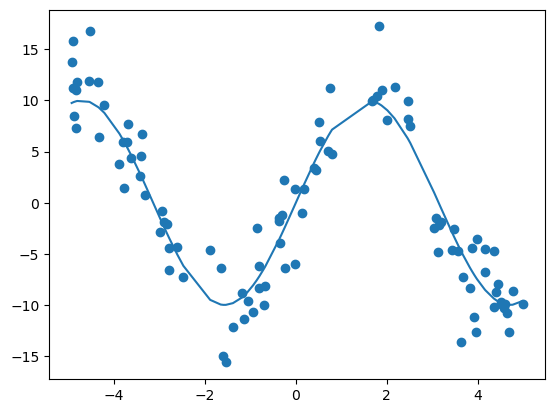

In [3]:
Feature = []
Ground_truth = []
Label = []

for n in range(100):
  Feature.append((np.random.rand() - 0.5) * 10)

Feature.sort()

for n in range(100):
  Ground_truth.append(fn(Feature[n]))
  Label.append(Ground_truth[n] + np.random.normal(scale=3))

plt.plot(Feature, Ground_truth)
plt.scatter(Feature, Label)

Define function of design matrix (Cr:Pattern recognition and machine learning, chapter 3)

In [4]:
N = 50
Design_matrix=[]
#def phi(x):
#  return [x**3, x**2, x, 1]

def phi(x, N):
  ret = []
  #ret = [x**(N-i) for i in range(N)]
  for i in range(N):
    ret.append(x**(N-i))
  ret.append(1)
  return ret
  
for x in Feature:
  Design_matrix.append(phi(x, N))


Label_v=np.array(Label)
Design_matrix_v = np.array(Design_matrix)

w=np.matmul(np.matmul(np.linalg.inv((0.9*np.identity(N+1)) + np.matmul(np.transpose(Design_matrix_v),Design_matrix_v)), np.transpose(Design_matrix_v)),Label_v)
w


array([ 2.90965680e-28, -2.51290025e-27, -2.78416049e-26,  1.55490793e-25,
        7.06965772e-25, -1.83564664e-24,  1.48516321e-24, -1.90584610e-23,
        2.08145764e-23, -8.93532165e-22, -9.85727631e-21,  4.15929016e-20,
       -2.01053591e-20, -7.79160410e-19,  7.43537810e-18,  5.71403748e-19,
       -6.86927341e-17,  9.06275783e-16, -2.21127484e-15, -1.37716496e-14,
        7.36586997e-14, -1.27918665e-13, -5.20104385e-13, -7.10426966e-12,
       -5.80233085e-12,  2.86057790e-10, -5.36653931e-10, -1.22879954e-09,
        1.80330069e-08,  4.74761150e-08, -6.34495165e-08, -2.90904179e-06,
        5.90973708e-07,  2.16232520e-05, -1.65569742e-04,  8.80470525e-04,
        4.52814509e-03, -2.13812911e-02, -5.59775213e-02,  2.09586437e-01,
        3.76648058e-01, -1.06821874e+00, -1.40366719e+00,  2.83690538e+00,
        2.60629365e+00, -3.58148868e+00, -1.34590640e+00,  1.04689404e+00,
       -1.30424550e+00,  8.28375504e+00,  9.47885856e-02])

Make plots with prediction, ground_truth and label

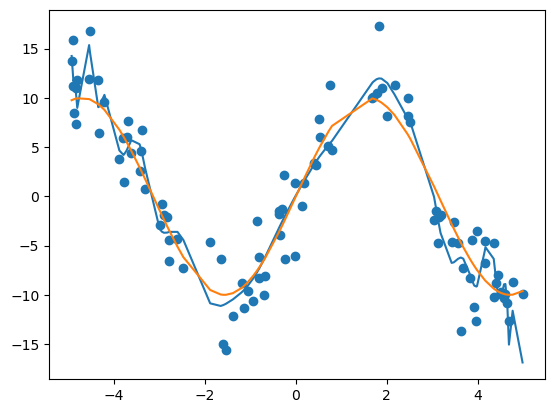

In [5]:
Prediction=[]

for x in Feature:
  Prediction.append(fn_poly(w, x))
plt.plot(Feature,Prediction)
plt.plot(Feature,Ground_truth)
plt.scatter(Feature, Label)